In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [83]:
df = pd.read_csv("heart.csv")

In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

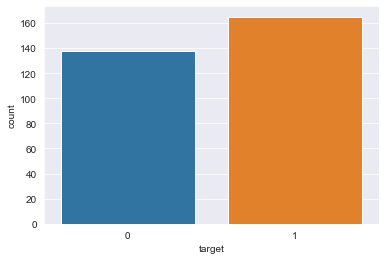

In [86]:
sns.set_style("darkgrid")
sns.countplot(x="target", data=df)
plt.show()

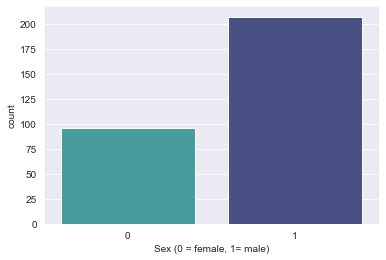

In [87]:
sns.set_style("darkgrid")
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [88]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients who does not have heart disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of patients who have heart disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of patients who does not have heart disease: 45.54%
Percentage of patients who have heart disease: 54.46%


In [89]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of female patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print(f"Percentage of male patients: {(countMale / (len(df.sex))*100)}%")

Percentage of female patients: 31.68%
Percentage of male patients: 68.31683168316832%


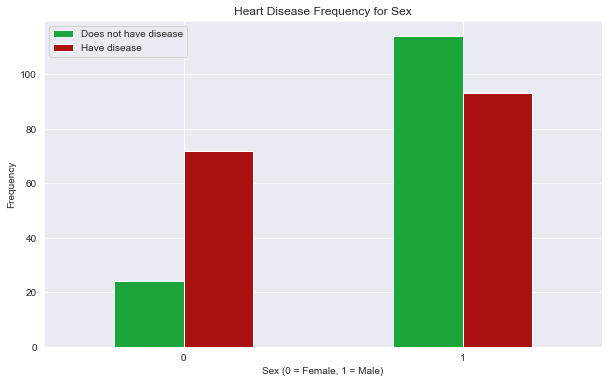

In [90]:
sns.set_style("darkgrid")
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Does not have disease", "Have disease"])
plt.ylabel('Frequency')
plt.show()

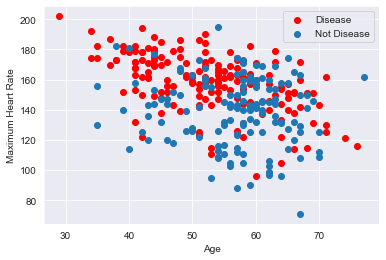

In [91]:
sns.set_style("darkgrid")
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [92]:
y_data = df.target.values
x_data = df.drop(['target'], axis = 1)

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.21,random_state=0)
x_train=np.array(x_train)
x_test=np.array(x_test)

In [94]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [95]:
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Logistic Regression Accuracy = {:.2f}%".format(acc))

Logistic Regression Accuracy = 84.38%


In [96]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 82.81%


In [97]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Accuracy is {:.2f}%".format(acc))

Maximum KNN Accuracy is 89.06%


In [98]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("SVM accuracy = : {:.2f}%".format(acc))

SVM accuracy = : 87.50%


In [99]:
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Naive Bayes accuracy = : {:.2f}%".format(acc))

Naive Bayes accuracy = : 85.94%


In [100]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy = {:.2f}%".format(acc))

Decision Tree Test Accuracy = 79.69%


In [101]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy = : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy = : 87.50%


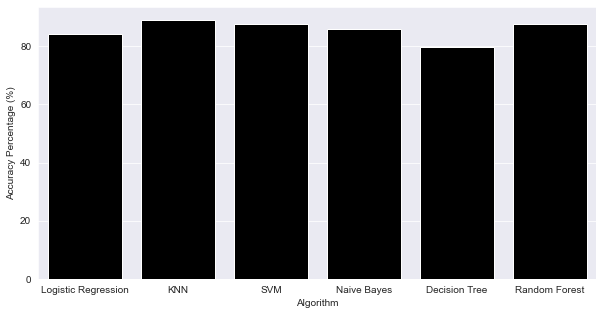

In [102]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,20))
plt.ylabel("Accuracy Percentage (%)")
plt.xlabel("Algorithm")
colours = ["black", "black", "black", "black","black"]
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()), palette=colours)
plt.show()

In [103]:
def single_pred_heart_disease(model, input_arr) :
    input_arr = np.array(input_arr)
    input_arr = input_arr.reshape(1, len(input_arr))
    return model.predict(input_arr)[0]

In [104]:
df.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [105]:
lis4 =[ 0.24210618,  0.68942631  ,0.04391716  ,1.29781029, -0.27856237, -0.41420843,
 -0.98324662 , 0.61616761, -0.71600156, -0.9013819 ,  0.951834  ,  0.25931554,
 -0.46827195]
chances = single_pred_heart_disease(rf,lis4)
print(chances)

0


In [106]:
import joblib
joblib.dump(rf,"model.pkl")
m=joblib.load("model.pkl")

In [107]:
print(x_train[1])

[ 0.24210618  0.68942631  0.04391716  1.29781029 -0.27856237 -0.41420843
 -0.98324662  0.61616761 -0.71600156 -0.9013819   0.951834    0.25931554
 -0.46827195]


In [108]:
lis2=[ 0.16585588, -1.47804445, -1.23560539 , 0.35134835,  0.86572681 ,-0.45109685
      ,1.03944749 , 0.12029967, -0.73029674,  0.24685025 , 0.64733704 ,-0.73421623,
 -0.951993]
chances = single_pred_heart_disease(rf,lis2)
print(chances)

1
